<a href="https://colab.research.google.com/github/shovalkooba/shoval1/blob/master/exe2_cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Confusion matrix plot function

In [0]:
"""
================
Confusion matrix
================

Example of confusion matrix usage to evaluate the quality
of the output of a classifier on the iris data set. The
diagonal elements represent the number of points for which
the predicted label is equal to the true label, while
off-diagonal elements are those that are mislabeled by the
classifier. The higher the diagonal values of the confusion
matrix the better, indicating many correct predictions.

The figures show the confusion matrix with and without
normalization by class support size (number of elements
in each class). This kind of normalization can be
interesting in case of class imbalance to have a more
visual interpretation of which class is being misclassified.

Here the results are not as good as they could be as our
choice for the regularization parameter C was not the best.
In real life applications this parameter is usually chosen
using :ref:`grid_search`.

"""

#print(__doc__)

import itertools
import numpy as np
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        normed_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        normed_cm = normed_cm*100;
        print("Normalized confusion matrix")
        print(normed_cm)
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.figure(figsize=(20,20))
    plt.imshow(normed_cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j,i, format(normed_cm[i, j], fmt)+'%\n('+(format(cm[i, j], 'd'))+')',
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.gcf().subplots_adjust(bottom=0.3)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')



Import Libraries

In [2]:
from keras.datasets import cifar10
from keras.models import Sequential, Model
import keras.layers as layers
from keras.utils import to_categorical
from keras import optimizers
from keras.models import model_from_json
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import numpy as np
from keras.layers import Conv2D,Flatten, Dense, Activation, MaxPooling2D, Dropout
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

Using TensorFlow backend.


Load Data

In [0]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Change labels to one-hot encoding
y_train = to_categorical(y_train)
x_train = to_categorical(x_train)

# Print shapes
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

170500096/170498071 [==============================] - 2s 0us/step


Define Parameters

In [0]:
num_of_clss =   10          # number of classes

lr =      0.0001               # learning rate 
beta_1 =      0.9           # beta 1 - for adam optimizer
beta_2 = 0.99        # beta 2 - for adam optimizer
epsilon =    1e-8            # epsilon - for adam optimizer
epochs =    8           # number of epochs 
bs =       64        # batch size


Network layes

In [1]:
model = Sequential()

model.add(Conv2D(16, (3, 3), strides=(1, 1), padding='same', activation = 'relu'))
#model.add(MaxPooling2D((2, 2)))

#model.add(Conv2D(8, (3, 3), strides=(1, 1), padding='same', activation = 'relu'))
#model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(16, activation = 'sigmoid'))
model.add(Dense(num_of_clss, activation= 'softmax'))



NameError: ignored

Train the model

In [65]:
# define the optimizer and compile the model
adam = optimizers.Adam(lr=lr, beta_1=beta_1, beta_2=beta_2, epsilon=epsilon)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model, iterating on the data in batches of 64 samples
history = model.fit(x_train, y_train, validation_split=0.3, epochs=epochs, batch_size=bs)


Train on 35000 samples, validate on 15000 samples
Epoch 1/8
 9536/35000 [=======>......................] - ETA: 14s - loss: 2.3921 - acc: 0.0997

KeyboardInterrupt: ignored

Plot Train and Validation loss

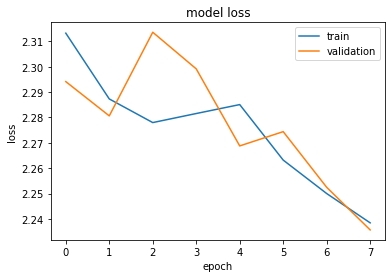

In [48]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show(); plt.close()


Model evaluation

In [0]:
test_loss, test_acc = model.evaluate(x_test, y_test)

# Print results
print('test loss:', test_loss)
print('test accuracy:', test_acc)

10000/10000 [==============================] - 0s 19us/step
test loss: 0.3939843383550644
test accuracy: 0.8913


Predict on test set

Normalized confusion matrix
[[9.71428571e+01 0.00000000e+00 5.10204082e-01 4.08163265e-01
  0.00000000e+00 1.02040816e+00 7.14285714e-01 2.04081633e-01
  0.00000000e+00 0.00000000e+00]
 [2.02643172e+00 9.45374449e+01 5.28634361e-01 3.52422907e-01
  0.00000000e+00 1.76211454e-01 4.40528634e-01 1.76211454e-01
  1.76211454e+00 0.00000000e+00]
 [7.75193798e+00 9.68992248e-02 8.58527132e+01 1.25968992e+00
  1.93798450e-01 2.90697674e-01 1.55038760e+00 4.84496124e-01
  2.13178295e+00 3.87596899e-01]
 [9.60396040e+00 0.00000000e+00 1.58415842e+00 8.22772277e+01
  9.90099010e-02 3.26732673e+00 0.00000000e+00 1.78217822e+00
  1.28712871e+00 9.90099010e-02]
 [4.98981670e+00 0.00000000e+00 3.05498982e-01 0.00000000e+00
  8.78818737e+01 0.00000000e+00 1.42566191e+00 1.01832994e-01
  9.16496945e-01 4.37881874e+00]
 [9.75336323e+00 1.12107623e-01 4.48430493e-01 3.92376682e+00
  5.60538117e-01 7.86995516e+01 1.68161435e+00 6.72645740e-01
  3.13901345e+00 1.00896861e+00]
 [8.24634656e+00 3.13152401e-0

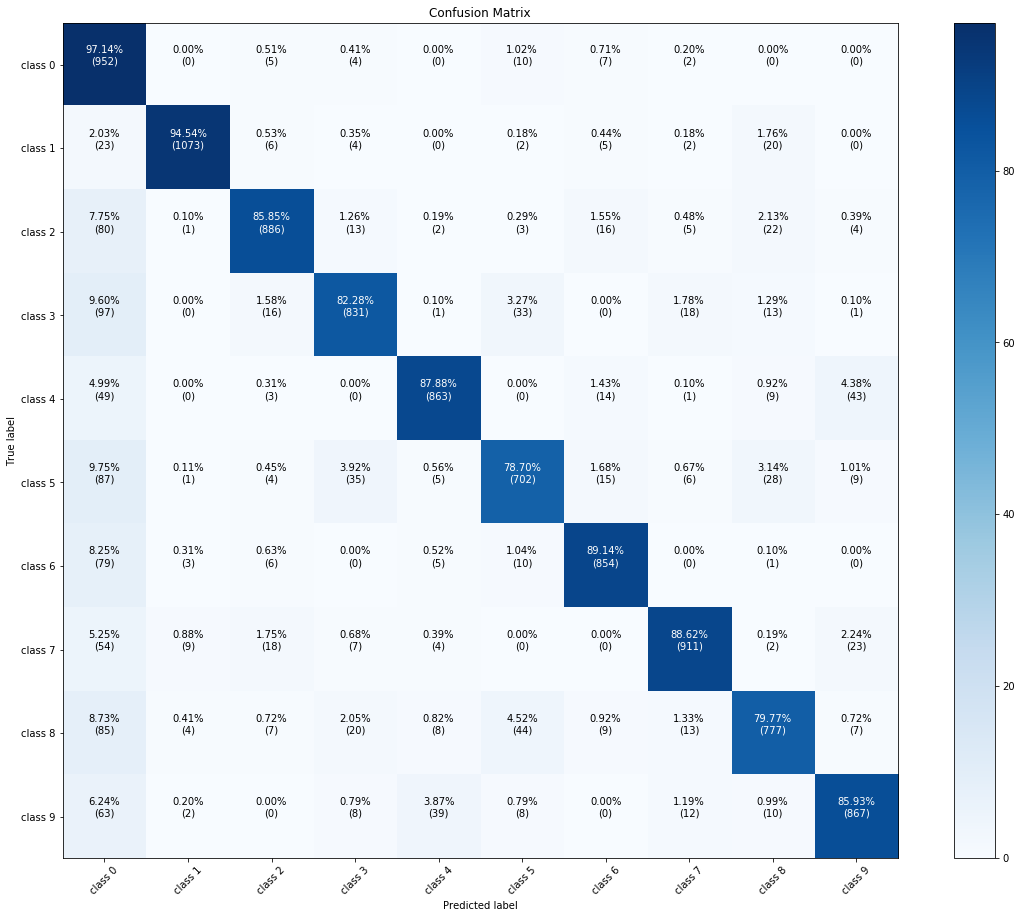

In [0]:
y_pred = model.predict(x_test)

# Confusion Matrix
cm = confusion_matrix(np.argmax(y_test,axis=1), np.argmax(np.round(y_pred),axis=1))
labels = ['class ' + str(i) for i in range(num_of_clss)] 
plot_confusion_matrix(cm,labels,title='Confusion Matrix',normalize=True)


Sunnerize

In [0]:
# Summerize the model arhiteture and parameters
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 12)                9420      
_________________________________________________________________
activation_5 (Activation)    (None, 12)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                130       
_________________________________________________________________
activation_6 (Activation)    (None, 10)                0         
Total params: 9,550
Trainable params: 9,550
Non-trainable params: 0
_________________________________________________________________
